# How to open .nwb file of indy and loco

## Filtering
The data are sampled at 24414.0625 Hz and are unfiltered, except for an anti-aliasing filter built-in to the recording amplifier: a 4th order low-pass with a roll-off of 24 dB per octave at 7.5 kHz, operating at the sampling rate.

## File format
The data are contained in an HDF5 formatted file, organized according to the Neurodata Without Borders (NWB) version 1.0.6 specification.

## Datasets
A few of the relevant dataset paths are listed here for convenience. In the below, n refers to the number of recording channels and k refers to the number of samples.

- "/acquisition/timeseries/broadband/data" - k x n
The broadband neural recordings.
- "/acquisition/timeseries/broadband/data/conversion" (scalar attribute)
When multiplied by each sample converts the data into units of volts.
- "/acquisition/timeseries/broadband/timestamps" - k x 1
Timestamps for each sample, seconds.
- "/general/extracellular_ephys/electrode_map" - n x 3
The relative coordinates of each electrode contact (x, y, z), meters.

In [1]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
# Read data
fullpath = os.path.join('/','home','jovyan','indy','The_nwb_Raw_Dataset','indy_20170124_01.nwb')
f = h5py.File(fullpath, 'r')
data = f['/acquisition/timeseries/broadband/data']
conversion = data.attrs['conversion']
timestamps = f['/acquisition/timeseries/broadband/timestamps']

In [3]:
fs = 24414.0625 
duration = 1
start = 100
channel = 96
signal_length = (int) (duration * fs)
# index_of_begin and index_of_end
ib = (int) (start * fs)
ie = ib + signal_length
ch1 = data[ib:ie].T[1-1]
t = timestamps[ib:ie]

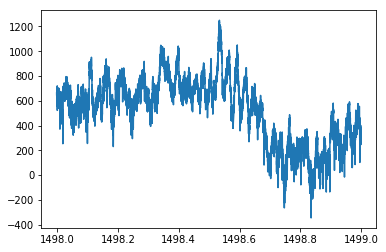

In [4]:
plt.plot(t, ch1)
plt.show()